# Remote Sensing

<img src="images/logo.png"  width=900/>

## Definition

- “Remote Sensing is the use of electromagnetic radiation sensors to record images of the environment, which can be interpreted to yield useful information“ (Curran 1985)


- Detection or recording of objects from a distance, without direct contact of the recording system, the so-called sensor, with the object to be explored (Kronberg 1985)

## Why remote sensing?

| Pro | Con   |
|------|------|
|   Large coverage  | table|
|Comprehensive coverage (without gaps)|Expensive (development, launch)|
|Physical measurements even in hardly accessible region|Technological limitations (z.B. SNR)
|
|Regular orbit (repeated acquisitions)|Complex data processing (usually automized)|
|Objective measurements|Indirect measurements (models, e.g., spectral indices as proxy of vegetation cover)|
|High degree of automation||
|Archiving function (“memory”)||
|Cheap (operation)||
|many applications not possible with field recordings (alone)||

## Fields of applications

<img src="images/rs_fields.png"  width=900/>

## Raster data in Python

Raster data sets such as aerial photographs, satellite images or digital elevation models are structured similarly to a matrix. The individual image points (i.e. pixels) are organized in rows and columns and each have a numerical value, which is converted into a color or brightness value for display

<img src="images/raster-concept.png"  width=900/>

<right>
<sub><sup>
Source: https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/
</sup></sub>
<right>

## GDAL

For importing and exporting of raster data files we can you use the poweful GDAL python package which includes a large set of tools for programming for manipulating the GDAL (Geospatial Data Abstraction) Library. GDAL actually includes two libraries: GDAL for manipulating geospatial raster data and OGR for manipulating geospatial vector data

- GDAL (Geospatial Data Abstraction Library) is the de facto standard library for interaction and manipulation of geospatial raster data
-  primary purpose of GDAL or a GDAL-enabled library is to read, write and transform geospatial datasets 
-  GDAL also includes a set of command-line utilities

<img src="images/gdal.png" width=100  />

Which formats can GDAL read and write?

In [ ]:
%system gdalinfo --formats

GDAL can operate on local files or even read files from the web 

In [ ]:
SERVER='http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1'
IMAGE='LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
%system gdalinfo /vsicurl/$SERVER/$IMAGE

Let’s start with inspecting our raster data

In [ ]:
from osgeo import gdal

filepath = "Data/raster/DSM_small.tif"

# Open the file:
raster = gdal.Open(filepath)

# Check type of the variable 'raster'
raster

The raster is now stored as a GDAL Dataset object in the variable raster. Now we can have a closer look at the properties

In [ ]:
# Projection
raster.GetProjection()

# Dimensions
raster.RasterXSize
raster.RasterYSize

# Number of bands
raster.RasterCount

# Metadata for the raster dataset
raster.GetMetadata()

### Get raster bands

In [ ]:
# Read the raster band as separate variable
band = raster.GetRasterBand(1)

# Data type of the values
gdal.GetDataTypeName(band.DataType)


### Band statistics

In [ ]:
# Compute statistics if needed
if band.GetMinimum() is None or band.GetMaximum()is None:
    band.ComputeStatistics(0)
    print("Statistics computed.")

# Fetch metadata for the band
band.GetMetadata()

# Print only selected metadata:
print ("[ NO DATA VALUE ] = ", band.GetNoDataValue()) # none
print ("[ MIN ] = ", band.GetMinimum())
print ("[ MAX ] = ", band.GetMaximum())

### Reading raster data into array

In [ ]:
rasterArray = raster.ReadAsArray()
rasterArray

GDAL also provides ready to use binaries, which you can run directly from command line (No need for importing libraries). 
These commands can be also run from your terminal. (The exclamation mark can be used to access the underlying shell directly from ipython)

In [ ]:
%system gdalinfo ./Data/raster/DSM_small.tif

## Rasterio

Another python library you can use is the ***rasterio*** library 

- Rasterio is based on GDAL and Python automatically registers all known GDAL drivers for reading supported formats when importing the module

- Rasterio is built with Cython, which follows conventions of familiar Python code (osgeo gdal is very similar to the native C++ API). 

- easier to use for python users and they don´t have to provide their own error handling and memory management.


When should you use rasterio instead of GDAL?

Maybe always?! But it depends on your personal preferences

In [ ]:
import rasterio

raster = rasterio.open("Data/raster/DSM_small.tif")
type(raster)

Now we have a rasterio._io.RasterReader type which means that we have opened the file for reading

Let’s have a closer look at the properties of the file:

In [ ]:
# Projection
print('CRS: ',raster.crs)

# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
print('Transform: ',raster.transform)

# Dimensions
print('Width: ',raster.width)
print('Height: ',raster.height)

### Get raster bands

We use read(1) because in this case we only want to read the first layer

In [ ]:
# Read the raster band as separate variable
band1 = raster.read(1)

# Check type of the variable 'band'
type(band1)

band1

### Band statistics

Now the values are stored in a numpy arrays. We can now use numpy functions we already know.

In [ ]:
import numpy as np

band1.min()
band1.mean()
np.median(band1)
band1.max()

The rasterio library is efficient as it establishes a connection with the raster file rather than directly reading it into memory. Because it creates a connection, it is important that you close the connection after it is opened AND after you’ve finished working with the data

In [ ]:
raster.close()

A better way to work with raster data in rasterio is to use the context manager. This will handle opening and closing the raster file for you.

In [ ]:
with rasterio.open("Data/raster/DSM_small.tif") as src:
    raster = src.read(1)
    width= src.width
    height = src.height
    bands = src.count

In [ ]:
width
raster

### Visualization

In [ ]:
%matplotlib inline
from rasterio.plot import show
from matplotlib import pyplot as plt

# Plot the dem using raster.io
fig, ax = plt.subplots(figsize=(10,10))
show(raster, 
     title="Lidar Digital Elevation Model (DEM)", 
     ax=ax)
ax.set_axis_off()

In [ ]:
from rasterio.plot import show

with rasterio.open("Data/raster/DSM_small.tif") as src:
    dsm = src.read(1, masked= True)
    transform = src.transform

    
show(dsm, cmap='viridis', transform=transform)

### Exercise

- Import DSM_small.tif (folder: Data/raster)
- Write a function which which takes a raster file as input and returns informations about:
    - Driver
    - Height, Width
    - Number of Bands
    - Number of pixels
    - Pixel Size (Resoultion)
    - CRS
    - Data type
    - Coordinates of the bounding box
    - Min, Max, Mean 
- Plot a histrogram showing the distribution of height values

## Raster calculations

Conducting calculations between bands or raster is another common GIS task.We often want to perform calculations on two or more rasters to create a new output raster. For example, if we are interested in mapping the heights of trees across an entire field site, we might want to calculate the difference between the Digital Surface Model (DSM, tops of trees) and the Digital Terrain Model (DTM, ground level). The resulting dataset is referred to as a Canopy Height Model (CHM) and represents the actual height of trees, buildings, etc. with the influence of ground elevation removed.

<img src="images/lidarTree-height.png" width=400  />

In [1]:
with rasterio.open("Data/raster/DSM_small.tif") as src:
    dsm = src.read(1)
with rasterio.open("Data/raster/DTM_small.tif") as src:
    dtm = src.read(1)

raster_chm = dsm - dtm

NameError: name 'rasterio' is not defined

### Export raster

If we want to export our raster data we always have to consider the metdata associated with the raster. For the raster math we used only the numpy arrays we have derived from the raster object. At the moment the CHM has no spatial arributes. 

In [ ]:
raster_chm

In order to export a proper GeoTiff we need to assign all of the spatial attributes. Letś look at the metadata of our raster data object.

In [ ]:
src.meta

In this case, we can use the metadata of our input object because nothing changed in the metadata. We only will  update the nodata value we have masked out. This can be achived with the  np.ma.filled() function. Therefor we create a copy of the metadata and update the nodata value

In [ ]:
nodatavalue = -9999.0
raster_chm = np.ma.filled(raster_chm, fill_value=nodatavalue)
raster_chm.min(), nodatavalue

In [ ]:
chm_meta = src.meta.copy()
chm_meta.update({'nodata': nodatavalue})
chm_meta

Now we can export our CHM as GeoTiff

In [ ]:
out_path = "Data/raster/CHM_small.tif"
with rasterio.open(out_path, 'w', **chm_meta) as outf:
    outf.write(raster_chm, 1)

### Masking / clipping raster

<img src="images/clip.png" width=600  />

In [ ]:
from rasterio import mask
from rasterio import plot
from shapely.geometry import box
import geopandas as gpd
import os
from fiona.crs import from_epsg
%matplotlib inline


raster = rasterio.open("Data/raster/CHM_small.tif")
plot.show((raster, 1), cmap='terrain')

Next we create a bounding box around the desired region and clip the raster based on that.

In [ ]:
minx, miny = 4611671, 5419572
maxx, maxy = 4612153, 5419911
bbox = box(minx, miny, maxx, maxy)

boundary = gpd.GeoDataFrame({'geometry': bbox}, index=[0], crs=from_epsg(31468))
print(boundary)
boundary.plot()

Now we need to get the coordinates in such a format that rasterio understands them. Therefor we use a function to convert the geometry into json format

In [ ]:
import json

def extract_features(geodataframe):
    return [json.loads(geodataframe.to_json())['features'][0]['geometry']]


coords = extract_features(boundary)
print(coords)



Clipping the raster can be done with the mask function. Be sure you specifying clip=True.

In [ ]:
# Clip the raster with Polygon
out_img, out_transform = mask.mask(dataset=raster, shapes=coords, crop=True)

In [ ]:
plot.show(out_img, cmap='terrain')

Don't forget to update the metadata

In [ ]:
# Copy the metadata
out_meta = raster.meta.copy()
print(out_meta)

In [ ]:
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": raster.crs}
                         )

Now we can export our raster data

In [ ]:
with rasterio.open("Data/raster/chm_clip", "w", **out_meta) as dest:
        dest.write(out_img)

### Mosaicing

<img src="images/mosaic.png" width=400  />

First of all we need the different raster files we need for our mosaic

In [ ]:
import os
import glob

search_criteria = "DSM*.tif"
q = os.path.join("Data/raster/", search_criteria)

raster_list = glob.glob(q)
raster_list

Now we can import all this files with rasterio

In [ ]:

src_files_to_mosaic = []

for fp in raster_list:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)
    
src_files_to_mosaic   

..and merge them 

In [ ]:
from rasterio.merge import merge
    
dest, output_transform=merge(src_files_to_mosaic, nodata = -9999, precision=7)

with rasterio.open("Data/raster/DSM_small.tif") as src:
        out_meta = src.meta.copy()    

        out_meta.update({"driver": "GTiff",
                 "height": dest.shape[1],
                 "width": dest.shape[2],
                 "transform": output_transform})

with rasterio.open("Data/raster/mosaic.tif", "w", **out_meta) as dest1:
        dest1.write(dest)

In [ ]:
with rasterio.open('Data/raster/mosaic.tif') as src:
    mosaic = src.read(1)
    

In [ ]:
mosaic[( mosaic < 0)] = np.nan

    
# Plot the dem using raster.io
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 10)
plt.imshow(mosaic) 
cbar = plt.colorbar(); plt.set_cmap('gist_earth'); 

ax.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation #
rotatexlabels = plt.setp(ax.get_xticklabels(),rotation=90) #rotate x tick labels 90 degree

## Exercise

A hillshade raster showa a grayscale 3D representation of the terrain surface, with the sun's relative position taken into account for shading the image. 

- Import the Canopy Height Model we have created
- Calculate the hillshade
- Visualize the resulting raster

## Working with multispectral data

<img src="images/multiband.jpg"  />

Source:http://www.charim.net/datamanagement/33

In [2]:
#import required libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import os
import rasterio
from rasterio.plot import show
import numpy as np
import earthpy.plot as ep
import earthpy as et
from earthpy.io import path_to_example

In [57]:
et.data.get_data('cs-test-landsat')

Extracted output to /home/sth02bh/earth-analytics/data/cs-test-landsat/.


'/home/sth02bh/earth-analytics/data/cs-test-landsat/.'

In [64]:
raster = rasterio.open('/home/sth02bh/earth-analytics/data/cs-test-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band5.tif')

In [65]:
# Projection
print('CRS: ',raster.crs)

# Affine transform (how raster is scaled, rotated, skewed, and/or translated)
print('Transform: ',raster.transform)

# Dimensions
print('Width: ',raster.width)
print('Height: ',raster.height)

# Number of bands
print('Bands: ',raster.count)

# Bounds of the file
print('Boundary: ',raster.bounds)

# Driver (data format)
print('Driver: ', raster.driver)

# No data values for all channels
print('NoData: ', raster.nodatavals)

# All Metadata for the whole raster dataset
print('Metdata: ',raster.meta)


CRS:  EPSG:32613
Transform:  | 30.00, 0.00, 318585.00|
| 0.00,-30.00, 4583115.00|
| 0.00, 0.00, 1.00|
Width:  7791
Height:  7911
Bands:  1
Boundary:  BoundingBox(left=318585.0, bottom=4345785.0, right=552315.0, top=4583115.0)
Driver:  GTiff
NoData:  (-9999.0,)
Metdata:  {'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 7791, 'height': 7911, 'count': 1, 'crs': CRS.from_epsg(32613), 'transform': Affine(30.0, 0.0, 318585.0,
       0.0, -30.0, 4583115.0)}


In [66]:
band5 = raster.read(1)

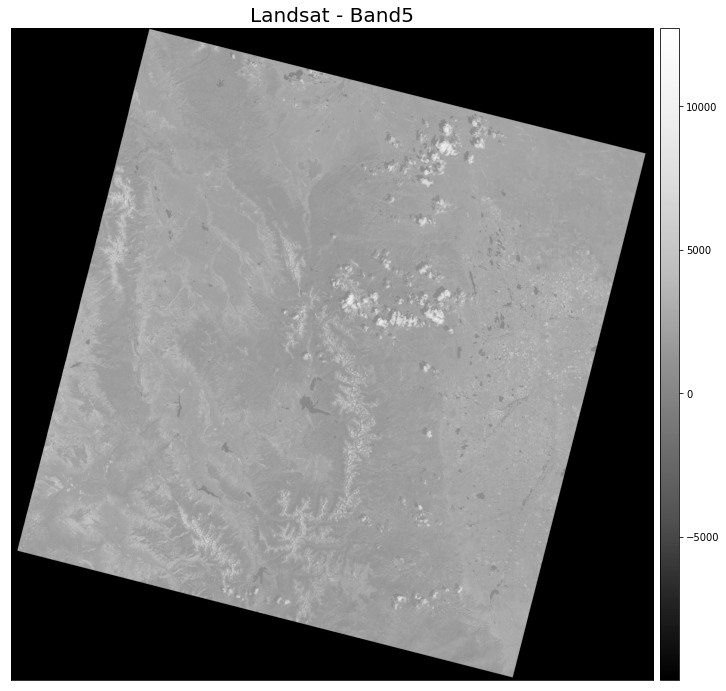

In [67]:
ep.plot_bands(band5, title="Landsat - Band5")

### Create raster stack

But often we don't want to read only one band, but all bands as a stack.

In [68]:
import glob

landsat_paths= glob.glob("/home/sth02bh/earth-analytics/data/cs-test-landsat/*band*.tif")
landsat_paths.sort()
landsat_paths

['/home/sth02bh/earth-analytics/data/cs-test-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band1.tif',
 '/home/sth02bh/earth-analytics/data/cs-test-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band2.tif',
 '/home/sth02bh/earth-analytics/data/cs-test-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band3.tif',
 '/home/sth02bh/earth-analytics/data/cs-test-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band4.tif',
 '/home/sth02bh/earth-analytics/data/cs-test-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band5.tif',
 '/home/sth02bh/earth-analytics/data/cs-test-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band6.tif',
 '/home/sth02bh/earth-analytics/data/cs-test-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band7.tif']

In [69]:
import earthpy.spatial as es

path_landsat_stack = '/home/sth02bh/earth-analytics/data/cs-test-landsat/stacked.tif'
stack = es.stack(landsat_paths, path_landsat_stack)
stack

(array([[[-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         ...,
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999]],
 
        [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         ...,
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999]],
 
        [[-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         ...,
         [-9999, -9999, -9999, ..., -9999, -9999, -9999],
         [-9999, -9999, 

In [3]:
raster = rasterio.open('/home/sth02bh/earth-analytics/data/cs-test-landsat/stacked.tif')

In [71]:
print('Bands: ',raster.count)

Bands:  7


<img src="images/Landsat8_bands.png"  />


<img src="images/waveband.jpg" width="800" />

Source:https://landsat.gsfc.nasa.gov/

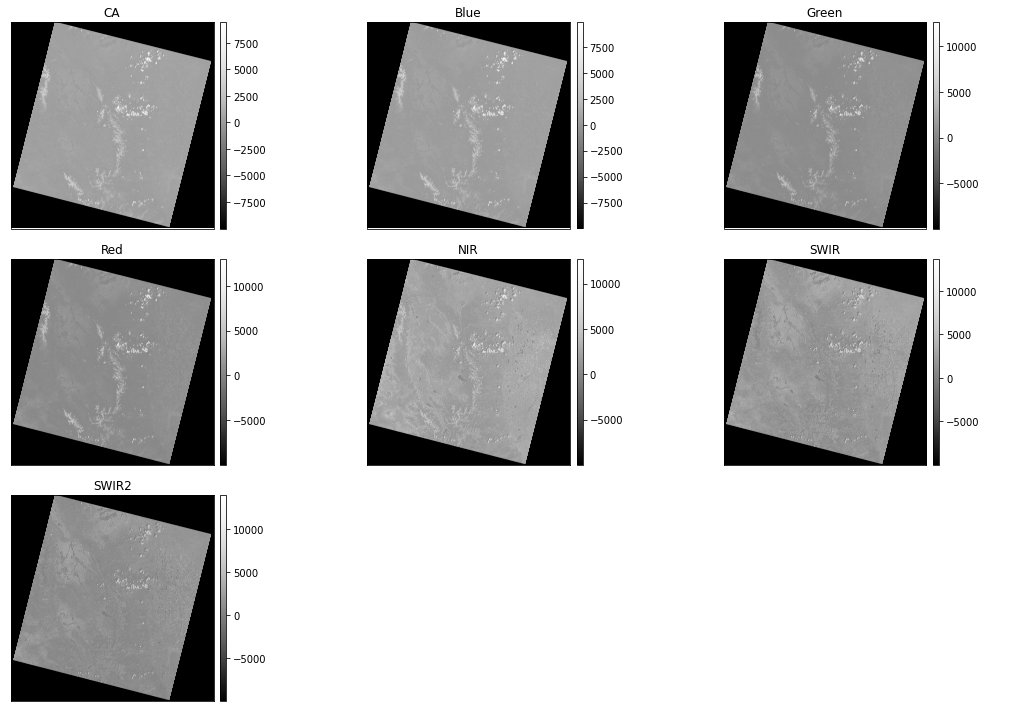

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0968325850>,
      dtype=object)

In [4]:
titles = ['CA','Blue', 'Green', 'Red', 'NIR','SWIR','SWIR2']
ep.plot_bands(raster.read(),title=titles,figsize=(15, 10))

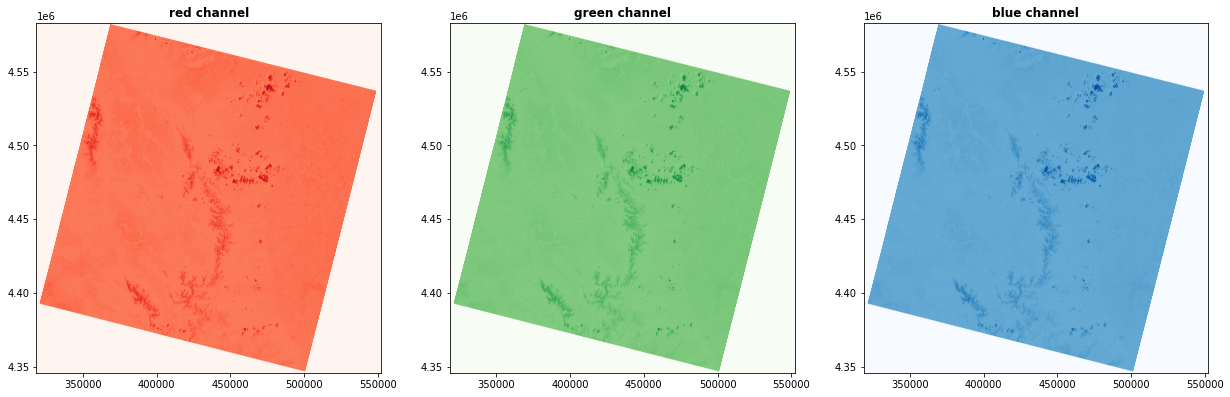

In [5]:
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))

show((raster, 4), ax=axr, cmap='Reds', title='red channel')
show((raster, 3), ax=axg, cmap='Greens', title='green channel')
show((raster, 2), ax=axb, cmap='Blues', title='blue channel')

plt.show()

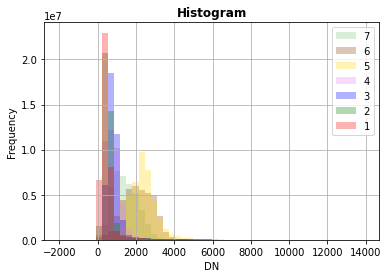

In [6]:
from rasterio.plot import show_hist
show_hist(raster, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

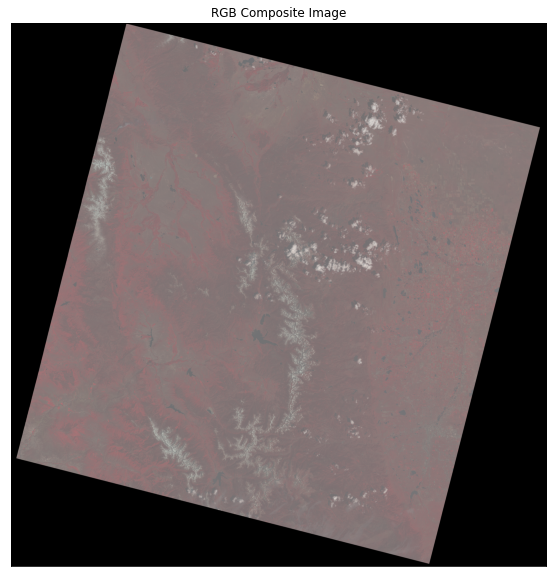

In [7]:
from earthpy.plot import plot_rgb
plot_rgb(raster.read(),
           rgb=[4, 3, 2],
            title="RGB Composite Image")

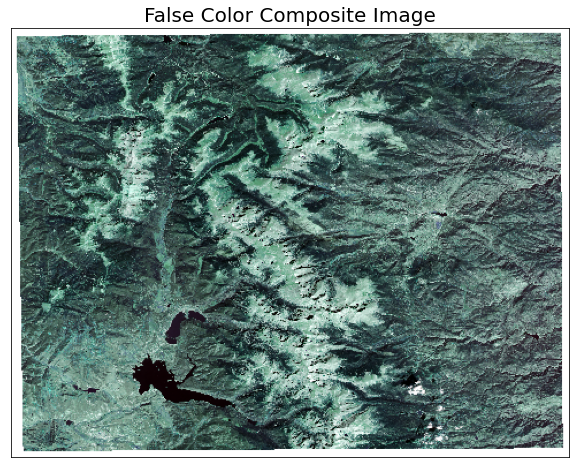

In [53]:
plot_rgb(raster.read(),
           rgb=[2, 0, 1],
            title="False Color Composite Image",
            stretch=True,
            str_clip=0.1)

In [55]:
path_to_example('cs-test-landsat')

KeyError: 'cs-test-landsat not found in earthpy example data.'